Импортируем необходимые в работе модули:

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок



Загружаем наш исходный датасет

In [200]:
df = pd.read_csv('stud_math.csv')

Предварительно рассмотрим общую информацию о файле

In [201]:
display(df.head(10))
df.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Краткий список того, что заметно без погружения в данные:

    * В датафрейме присутствуют пустые значения,
    * Некоторые переменные типа float64 можно заменить на int (к примеру Fedu Medu), для экономии памяти( в нагем небольшом датасете это конечно не сильно актуально, изза малого количества позиций. но раз уж делать что-то, то качественно)

Название колонок меня в принципе устраивает, кроме "studytime, granular", но вернемся к нему когда будем просматривать каждый series подробнее

# school 

Посмотрим, сколько уникальных значений, и какими значениями вообще редставлен данный Series

2
['GP' 'MS']
пустых значений - 0


(array([349.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  46.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

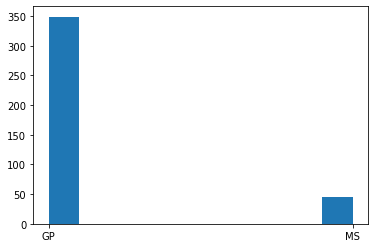

In [202]:
print(df.school.nunique())
print(df.school.unique())
print('пустых значений - {}'.format(len(df.school[df.school.isna()])))
plt.hist(df.school)

Видим, что всего 2 уникалных значения в данном Series и большя часть учеников относятся к школе GP

# sex 

Уникальных значений: 2
эти значения представлены следующими элементами: ['F' 'M']
пустых значений - 0
Выборка состоит из 208 девочек ( F )
а, так же из 187 мальчиков (M)


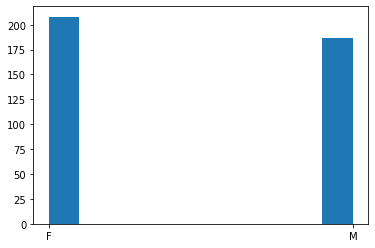

In [203]:
print('Уникальных значений:', df.sex.nunique())
print('эти значения представлены следующими элементами:', df.sex.unique())
print('пустых значений - {}'.format(len(df.sex[df.sex.isna()])))
plt.hist(df.sex)
#далее идет код с выводом информации по распределению бинарного параметра, написанный двумя способами, 
#просто показат что я так умею 
print('Выборка состоит из', df[df.sex==df.sex.unique()[0]].sex.count(), "девочек (", df.sex.unique()[0],")")
print('а, так же из {} мальчиков ({})'.format(df[df.sex==df.sex.unique()[1]].sex.count(),df.sex.unique()[1]))

Гендерное распределение почти равное с небольшим преобладанием в доли женщин, пустых значений не содержит(это мы знали с самого начала)

# age

количество уникальных значений в данной категории - 8
диапазон данных - [15 16 17 18 19 20 21 22]
пустых значений - 0


<AxesSubplot:>

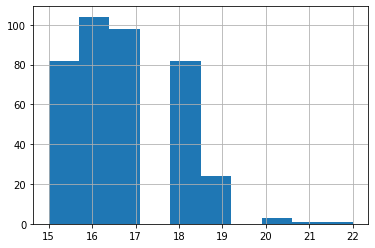

In [204]:
print('количество уникальных значений в данной категории - {}'.format(df.age.nunique()))
print('диапазон данных - {}'.format(df.age.sort_values().unique()))
print('пустых значений - {}'.format(len(df.age[df.age.isna()])))
df.age.hist()

Создается ощущение, что студентов в возрасте от 17 до 18 не существует, но это связано с тем, что гистограмма автоматически распределила все данные на 10 категорий, хотя уникальных значений в нашем столбце всего 8. Перестроим диаграмму чтобы в этом убедится

(array([ 82., 104.,  98.,  82.,  24.,   3.,   2.]),
 array([15, 16, 17, 18, 19, 20, 21, 22], dtype=int64),
 <BarContainer object of 7 artists>)

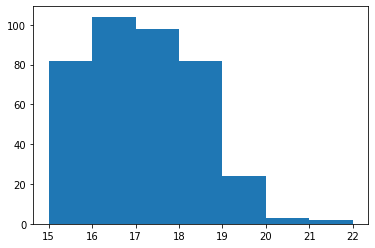

In [205]:
plt.hist(df.age, bins =df.age.sort_values().unique())

Не смотря на то, что количество учеников в возрасте более 19 лет невелико - оно не противоречит условию задачи, поэтому оставляем эти данные

# address

Посмотрим, сколько уникальных значений, и какими значениями представлен данный Series

количество уникальных значений в данной категории - 2
эти значения представлены следующими элементами: ['U' nan 'R']
пустых значений - 17


<AxesSubplot:>

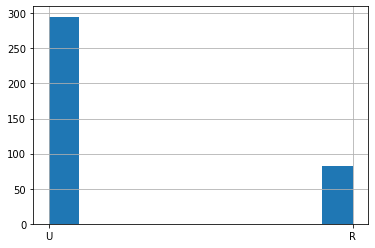

In [206]:
print('количество уникальных значений в данной категории - {}'.format(df.address.nunique()))
print('эти значения представлены следующими элементами: {}'.format(df.address.unique()))
print('пустых значений - {}'.format(len(df.address[df.address.isna()])))
df.address.hist()


Видим, что данные содержат пустые значения. Информацию о проживании восстановить будет невозможно.

Заметно что подавляющее число учеников проживает в сельской местности

# famsize 

количество уникальных значений в данной категории - 2
диапазон данных - ['GT3' 'LE3' nan]
пустых значений - 27


<AxesSubplot:>

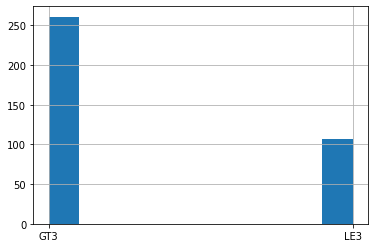

In [207]:
print('количество уникальных значений в данной категории - {}'.format(df.famsize.nunique()))
print('диапазон данных - {}'.format(df.famsize.sort_values().unique()))
print('пустых значений - {}'.format(len(df.famsize[df.famsize.isna()])))
df.famsize.hist()

Видим, что данные содержат пустые значения. Информацию о количестве членов семьи восстановить будет невозможно.

видно, что почти две трети число учеников проживает в семьях с 3мя и более человек

# Pstatus  

Уникальных значений: 2
эти значения представлены следующими элементами: ['A' nan 'T']
пустых значений - 45
Выборка состоит из 36 учеников проживающих раздельно от родителей (A)
а, так же из 314 учеников проживающих совместно (T)


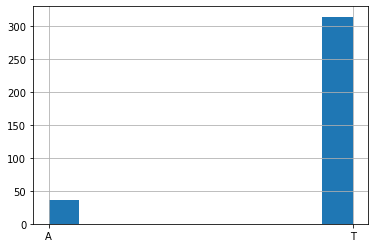

In [208]:
print('Уникальных значений:', df.Pstatus.nunique())
print('эти значения представлены следующими элементами:', df.Pstatus.unique())
print('пустых значений - {}'.format(len(df.Pstatus[df.Pstatus.isna()])))
df.Pstatus.hist()

print('Выборка состоит из {} учеников проживающих раздельно от родителей ({})'.format(df[df.Pstatus==df.Pstatus.unique()[0]].Pstatus.count(), df.Pstatus.unique()[0]))
print('а, так же из {} учеников проживающих совместно ({})'.format(df[df.Pstatus==df.Pstatus.unique()[2]].Pstatus.count(),df.Pstatus.unique()[2]))

# Medu   

In [209]:
df.Medu=df.Medu.apply(lambda x: int(x) if x >=0 else x)

количество уникальных значений в данной категории - 5
диапазон данных - [ 0.  1.  2.  3.  4. nan]
пустых значений - 3


<AxesSubplot:>

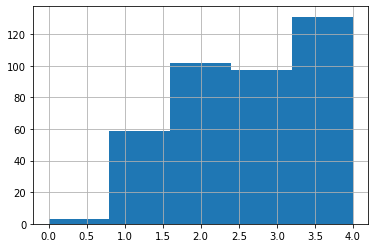

In [210]:
print('количество уникальных значений в данной категории - {}'.format(df.Medu.nunique()))
print('диапазон данных - {}'.format(df.Medu.sort_values().unique()))
print('пустых значений - {}'.format(len(df.Medu[df.Medu.isna()])))
df.Medu.hist(bins=df.Medu.nunique())

Большая часть Матерей имеет высшее образование

# Fedu 

In [211]:
print('количество уникальных значений в данной категории - {}'.format(df.Fedu.nunique()))
print('диапазон данных - {}'.format(df.Fedu.sort_values().unique()))
print('пустых значений - {}'.format(len(df.Fedu[df.Fedu.isna()])))

количество уникальных значений в данной категории - 6
диапазон данных - [ 0.  1.  2.  3.  4. 40. nan]
пустых значений - 24


Видимо закралась ошибка. число 40 не входит в  ожидаемый нами диапазон данных. удалим его (очевидно что это ошибка в записи, но что имел ввиду автор данных? 4 или 0? мы бы могли исправить данные, будь они текстом, но с цифрами все неоднозначно)

In [212]:
df=df[df.Fedu!=40]

проверяем:

In [213]:
print('количество уникальных значений в данной категории - {}'.format(df.Fedu.nunique()))
print('диапазон данных - {}'.format(df.Fedu.sort_values().unique()))
print('пустых значений - {}'.format(len(df.Fedu[df.Fedu.isna()])))

количество уникальных значений в данной категории - 5
диапазон данных - [ 0.  1.  2.  3.  4. nan]
пустых значений - 24


Данные неподходящие для выборки удалены

<AxesSubplot:>

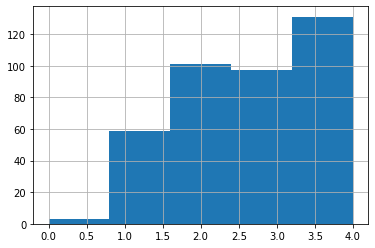

In [214]:
df.Medu.hist(bins=df.Fedu.nunique())

Большая часть Отцов также имеет высшее образование

# Mjob 

количество уникальных значений в данной категории - 5
диапазон данных - ['at_home' 'health' 'other' 'services' 'teacher' nan]
пустых значений - 19


(array([ 58.,   0.,  32.,   0.,   0., 133.,   0.,  97.,   0.,  55.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

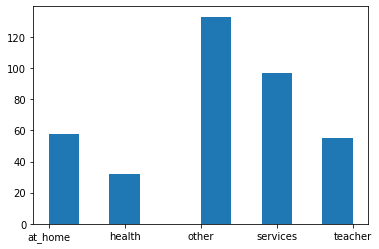

In [215]:
print('количество уникальных значений в данной категории - {}'.format(df.Mjob.nunique()))
print('диапазон данных - {}'.format(df.Mjob.sort_values().unique()))
print('пустых значений - {}'.format(len(df.Mjob[df.Mjob.isna()])))
#отобразим только ненулевые значения
plt.hist(df.Mjob[df.Mjob.notnull()])

# Fjob 

количество уникальных значений в данной категории - 5
диапазон данных - ['at_home' 'health' 'other' 'services' 'teacher' nan]
пустых значений - 36


(array([ 29.,   0., 196.,   0.,   0.,  15.,   0., 102.,   0.,  16.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

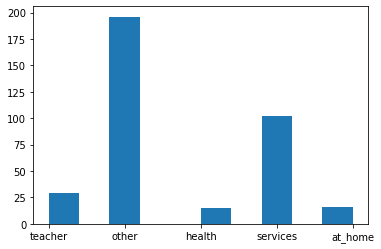

In [216]:
print('количество уникальных значений в данной категории - {}'.format(df.Fjob.nunique()))
print('диапазон данных - {}'.format(df.Fjob.sort_values().unique()))
print('пустых значений - {}'.format(len(df.Fjob[df.Fjob.isna()])))
#отобразим только ненулевые значения
plt.hist(df.Fjob[df.Fjob.notnull()])

Среди отцов, в отличие от матерей, гораздо меньше безработных. Как и работников здравоохранения и образования. 

# reason 

количество уникальных значений в данной категории - 4
диапазон данных - ['course' 'home' 'other' 'reputation' nan]
пустых значений - 17


(array([137.,   0.,   0.,  34.,   0.,   0., 104.,   0.,   0., 102.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

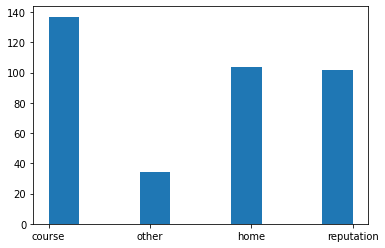

In [217]:
print('количество уникальных значений в данной категории - {}'.format(df.reason.nunique()))
print('диапазон данных - {}'.format(df.reason.sort_values().unique()))
print('пустых значений - {}'.format(len(df.reason[df.reason.isna()])))
#отобразим только ненулевые значения
plt.hist(df.reason[df.reason.notnull()])

Наиболее частой причиной выбора школы являлась образовательная программа. на втором мсте по значимости, примерно в равных долях, идут репутация и близость к дому

# guardian  

количество уникальных значений в данной категории - 3
диапазон данных - ['father' 'mother' 'other' nan]
пустых значений - 31


(array([250.,   0.,   0.,   0.,   0.,  85.,   0.,   0.,   0.,  28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

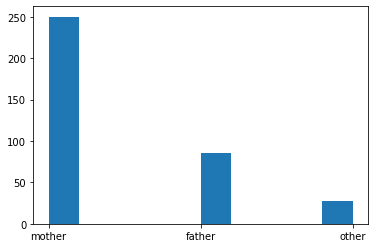

In [218]:
print('количество уникальных значений в данной категории - {}'.format(df.guardian.nunique()))
print('диапазон данных - {}'.format(df.guardian.sort_values().unique()))
print('пустых значений - {}'.format(len(df.guardian[df.guardian.isna()])))
#отобразим только ненулевые значения
plt.hist(df.guardian[df.guardian.notnull()])

Для большинства студентов опекуном является мать (?!?! к чему этот столбец, если семья полная?)

# traveltime 

количество уникальных значений в данной категории - 4
диапазон данных - [ 1.  2.  3.  4. nan]
пустых значений - 28


(array([242.,  96.,  21.,   7.]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 <BarContainer object of 4 artists>)

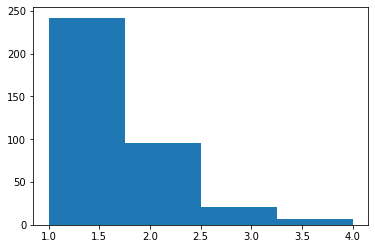

In [219]:
print('количество уникальных значений в данной категории - {}'.format(df.traveltime.nunique()))
print('диапазон данных - {}'.format(df.traveltime.sort_values().unique()))
print('пустых значений - {}'.format(len(df.traveltime[df.traveltime.isna()])))
#отобразим только ненулевые значения
plt.hist(df.traveltime[df.traveltime.notnull()], bins=df.traveltime.nunique())

большая част студентов тратит на дорогу менее= 15 минут. Везет им.

# studytime 

количество уникальных значений в данной категории - 4
диапазон данных - [ 1.  2.  3.  4. nan]
пустых значений - 7


(array([103., 194.,  63.,  27.]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 <BarContainer object of 4 artists>)

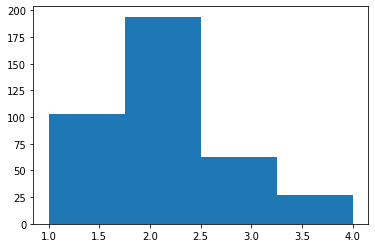

In [220]:
print('количество уникальных значений в данной категории - {}'.format(df.studytime.nunique()))
print('диапазон данных - {}'.format(df.studytime.sort_values().unique()))
print('пустых значений - {}'.format(len(df.studytime[df.studytime.isna()])))
#отобразим только ненулевые значения
plt.hist(df.studytime[df.studytime.notnull()], bins=df.studytime.nunique())

большая часть студентов занимается дополнительно, тратя на это от 2.5 до 5 часов в неделю

# failures

количество уникальных значений в данной категории - 4
диапазон данных - [ 0.  1.  2.  3. nan]
пустых значений - 22


(array([292.,  49.,  16.,  15.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

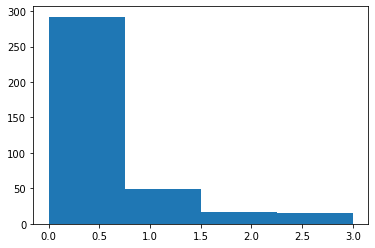

In [221]:
print('количество уникальных значений в данной категории - {}'.format(df.failures.nunique()))
print('диапазон данных - {}'.format(df.failures.sort_values().unique()))
print('пустых значений - {}'.format(len(df.failures[df.failures.isna()])))
#отобразим только ненулевые значения
plt.hist(df.failures[df.failures.notnull()], bins=df.failures.nunique())

Подавляющее большинство студентов не испытывает неудач во внеучебной деятельности

самый забавный факт - по условию задания к 0 относятся студенты с количеством неудач (n) в промежутке  1<=n<=3. То есть если у студента 4 неудачи, то он будет отнесен к той же группе что и студент без неудач

# schoolsup 

количество уникальных значений в данной категории - 2
диапазон данных - ['no' 'yes' nan]
пустых значений - 9


(array([ 51., 334.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

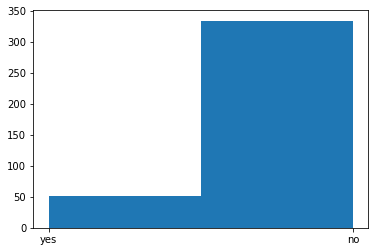

In [222]:
print('количество уникальных значений в данной категории - {}'.format(df.schoolsup.nunique()))
print('диапазон данных - {}'.format(df.schoolsup .sort_values().unique()))
print('пустых значений - {}'.format(len(df.schoolsup[df.schoolsup.isna()])))
#отобразим только ненулевые значения
plt.hist(df.schoolsup[df.schoolsup.notnull()], bins=df.schoolsup.nunique())

Дополнительной образовательной поддержкой пользуются 51 студент. Подавляющее большинство 334 не используют

# famsup  

количество уникальных значений в данной категории - 2
диапазон данных - ['no' 'yes' nan]
пустых значений - 39


(array([137., 218.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

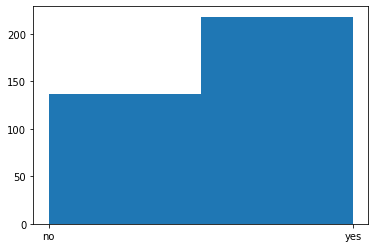

In [223]:
print('количество уникальных значений в данной категории - {}'.format(df.famsup.nunique()))
print('диапазон данных - {}'.format(df.famsup.sort_values().unique()))
print('пустых значений - {}'.format(len(df.famsup[df.famsup.isna()])))
#отобразим только ненулевые значения
plt.hist(df.famsup[df.famsup.notnull()], bins=df.famsup.nunique())

Семейной образовательной поддержкой пользуются 218 студентов. 

# paid   

количество уникальных значений в данной категории - 2
диапазон данных - ['no' 'yes' nan]
пустых значений - 40


(array([199., 155.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

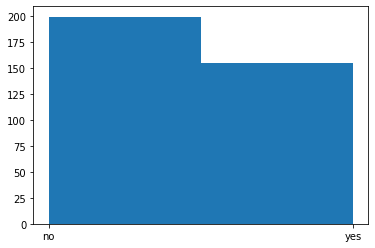

In [224]:
print('количество уникальных значений в данной категории - {}'.format(df.paid.nunique()))
print('диапазон данных - {}'.format(df.paid.sort_values().unique()))
print('пустых значений - {}'.format(len(df.paid[df.paid.isna()])))
#отобразим только ненулевые значения
plt.hist(df.paid[df.paid.notnull()], bins=df.paid.nunique())

Чуть меньше половины учеников прибегают к дополнительным платным занятиям по математике

# activities    

количество уникальных значений в данной категории - 2
диапазон данных - ['no' 'yes' nan]
пустых значений - 14


(array([186., 194.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

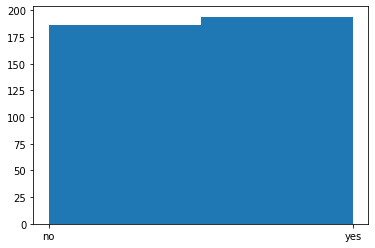

In [225]:
print('количество уникальных значений в данной категории - {}'.format(df.activities.nunique()))
print('диапазон данных - {}'.format(df.activities.sort_values().unique()))
print('пустых значений - {}'.format(len(df.activities[df.activities.isna()])))
#отобразим только ненулевые значения
plt.hist(df.activities[df.activities.notnull()], bins=df.activities.nunique())

Чуть меньше больше учеников ходят на дополнительные внеучебные занятия

# nursery

количество уникальных значений в данной категории - 2
диапазон данных - ['no' 'yes' nan]
пустых значений - 16


(array([299.,  79.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

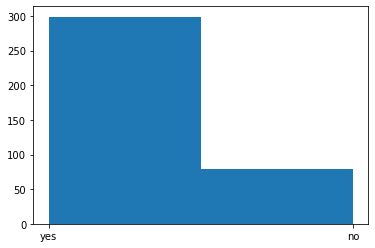

In [226]:
print('количество уникальных значений в данной категории - {}'.format(df.nursery.nunique()))
print('диапазон данных - {}'.format(df.nursery.sort_values().unique()))
print('пустых значений - {}'.format(len(df.nursery[df.nursery.isna()])))
#отобразим только ненулевые значения
plt.hist(df.nursery[df.nursery.notnull()], bins=df.nursery.nunique())

299 учеников посещали детский сад. 79 нет

# higher

количество уникальных значений в данной категории - 2
диапазон данных - ['no' 'yes' nan]
пустых значений - 20


(array([355.,  19.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

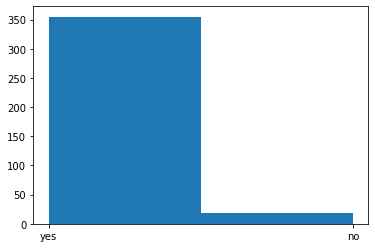

In [227]:
print('количество уникальных значений в данной категории - {}'.format(df.higher.nunique()))
print('диапазон данных - {}'.format(df.higher.sort_values().unique()))
print('пустых значений - {}'.format(len(df.higher[df.higher.isna()])))
#отобразим только ненулевые значения
plt.hist(df.higher[df.higher.notnull()], bins=df.higher.nunique())

практически все студенты планируют получать высшее образование

# internet 

количество уникальных значений в данной категории - 2
диапазон данных - ['no' 'yes' nan]
пустых значений - 34


(array([304.,  56.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

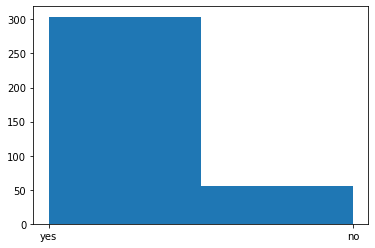

In [228]:
print('количество уникальных значений в данной категории - {}'.format(df.internet.nunique()))
print('диапазон данных - {}'.format(df.internet.sort_values().unique()))
print('пустых значений - {}'.format(len(df.internet[df.internet.isna()])))
#отобразим только ненулевые значения
plt.hist(df.internet[df.internet.notnull()], bins=df.internet.nunique())

У подавляющего большинства студентов есть доступ во всемирную паутину.

# romantic

количество уникальных значений в данной категории - 2
диапазон данных - ['no' 'yes' nan]
пустых значений - 31


(array([239., 124.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

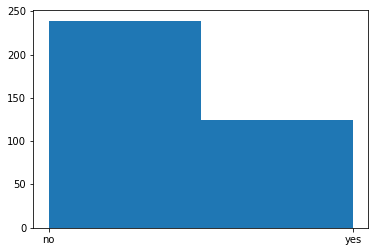

In [229]:
print('количество уникальных значений в данной категории - {}'.format(df.romantic.nunique()))
print('диапазон данных - {}'.format(df.romantic.sort_values().unique()))
print('пустых значений - {}'.format(len(df.romantic[df.romantic.isna()])))
#отобразим только ненулевые значения
plt.hist(df.romantic[df.romantic.notnull()], bins=df.romantic.nunique())

две трети студентов не состояли в романтических отношениях.

# famrel

количество уникальных значений в данной категории - 6
диапазон данных - [-1.  1.  2.  3.  4.  5. nan]
пустых значений - 27


(array([  1.,   0.,   7.,  17.,  62., 280.]),
 array([-1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <BarContainer object of 6 artists>)

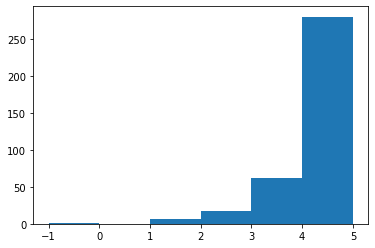

In [230]:
print('количество уникальных значений в данной категории - {}'.format(df.famrel.nunique()))
print('диапазон данных - {}'.format(df.famrel.sort_values().unique()))
print('пустых значений - {}'.format(len(df.famrel[df.famrel.isna()])))
#отобразим только ненулевые значения
plt.hist(df.famrel[df.famrel.notnull()], bins=df.famrel.nunique())

Видим у кого то отношения -1. видимо все очень плохо))) для этого значения поставим значение 1. Возможно это ошибка при обработке данных. Или ученик при заполнении анкеты поставил число выходящее за рамки. в любом случае - оно, скорее всего относится к категории 1.

In [231]:
df.famrel=df.famrel.apply(lambda x: 1 if x ==-1 else x)

количество уникальных значений в данной категории - 5
диапазон данных - [ 1.  2.  3.  4.  5. nan]
пустых значений - 27


(array([  8.,  17.,  62., 182.,  98.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

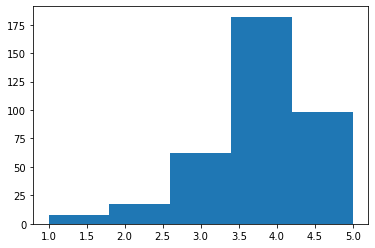

In [232]:
print('количество уникальных значений в данной категории - {}'.format(df.famrel.nunique()))
print('диапазон данных - {}'.format(df.famrel.sort_values().unique()))
print('пустых значений - {}'.format(len(df.famrel[df.famrel.isna()])))
#отобразим только ненулевые значения
plt.hist(df.famrel[df.famrel.notnull()], bins=df.famrel.nunique())

От некорректного значения мы избавились.

# freetime 

количество уникальных значений в данной категории - 5
диапазон данных - [ 1.  2.  3.  4.  5. nan]
пустых значений - 11


(array([ 18.,  62., 153., 112.,  38.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

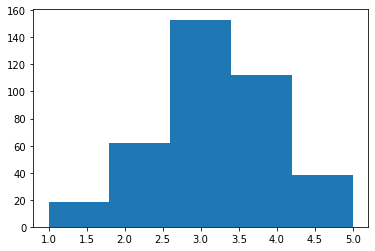

In [233]:
print('количество уникальных значений в данной категории - {}'.format(df.freetime.nunique()))
print('диапазон данных - {}'.format(df.freetime.sort_values().unique()))
print('пустых значений - {}'.format(len(df.freetime[df.freetime.isna()])))
#отобразим только ненулевые значения
plt.hist(df.freetime[df.freetime.notnull()], bins=df.freetime.nunique())

Большей части учеников хватает свободного времени (средне и выше)

# goout 

количество уникальных значений в данной категории - 5
диапазон данных - [ 1.  2.  3.  4.  5. nan]
пустых значений - 8


(array([ 23., 100., 127.,  84.,  52.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

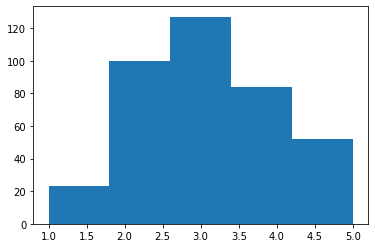

In [234]:
print('количество уникальных значений в данной категории - {}'.format(df.goout.nunique()))
print('диапазон данных - {}'.format(df.goout.sort_values().unique()))
print('пустых значений - {}'.format(len(df.goout[df.goout.isna()])))
#отобразим только ненулевые значения
plt.hist(df.goout[df.goout.notnull()], bins=df.goout.nunique())

многим ученикам кажется недостаточным времени, которое они проводят с друзьями

# health 

количество уникальных значений в данной категории - 5
диапазон данных - [ 1.  2.  3.  4.  5. nan]
пустых значений - 15


(array([ 47.,  43.,  89.,  62., 138.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

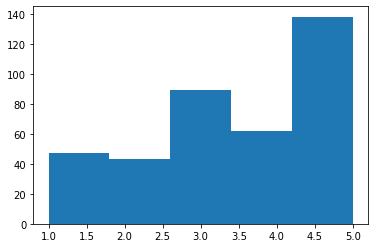

In [235]:
print('количество уникальных значений в данной категории - {}'.format(df.health.nunique()))
print('диапазон данных - {}'.format(df.health.sort_values().unique()))
print('пустых значений - {}'.format(len(df.health[df.health.isna()])))
#отобразим только ненулевые значения
plt.hist(df.health[df.health.notnull()], bins=df.health.nunique())

У большей части учеников состояние здоровья выше среднего

# absences

количество уникальных значений в данной категории - 36
диапазон данных - [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  28.
  30.  38.  40.  54.  56.  75. 212. 385.  nan]
пустых значений - 12


(array([317.,  49.,   9.,   2.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([  0.        ,  10.69444444,  21.38888889,  32.08333333,
         42.77777778,  53.47222222,  64.16666667,  74.86111111,
         85.55555556,  96.25      , 106.94444444, 117.63888889,
        128.33333333, 139.02777778, 149.72222222, 160.41666667,
        171.11111111, 181.80555556, 192.5       , 203.19444444,
        213.88888889, 224.58333333, 235.27777778, 245.97222222,
        256.66666667, 267.36111111, 278.05555556, 288.75      ,
        299.44444444, 310.13888889, 320.83333333, 331.52777778,
        342.22222222, 352.91666667, 363.61111111, 374.30555556,
        385.        ]),
 <BarContainer object of 36 artists>)

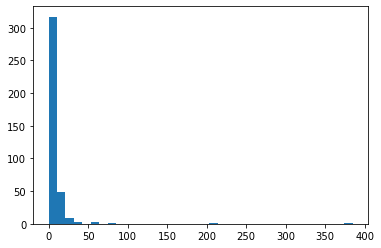

In [236]:
print('количество уникальных значений в данной категории - {}'.format(df.absences.nunique()))
print('диапазон данных - {}'.format(df.absences.sort_values().unique()))
print('пустых значений - {}'.format(len(df.absences[df.absences.isna()])))
#отобразим только ненулевые значения
plt.hist(df.absences[df.absences.notnull()], bins=df.absences.nunique())

317 учеников добросовестно посещали занятия. есть 2 студента, пропустившие по 212 и 385 занятий соответственно. 

(array([111.,   3.,  60.,   8.,  52.,   0.,   5.,  31.,   6.,  21.,   3.,
          0.,  17.,   2.,  12.,   2.,  12.,   0.,   2.,   7.,   1.,   5.,
          1.,   0.,   4.,   1.,   3.,   1.,   1.,   0.,   1.,   1.,   0.,
          1.,   0.,   1.]),
 array([ 0.        ,  0.83333333,  1.66666667,  2.5       ,  3.33333333,
         4.16666667,  5.        ,  5.83333333,  6.66666667,  7.5       ,
         8.33333333,  9.16666667, 10.        , 10.83333333, 11.66666667,
        12.5       , 13.33333333, 14.16666667, 15.        , 15.83333333,
        16.66666667, 17.5       , 18.33333333, 19.16666667, 20.        ,
        20.83333333, 21.66666667, 22.5       , 23.33333333, 24.16666667,
        25.        , 25.83333333, 26.66666667, 27.5       , 28.33333333,
        29.16666667, 30.        ]),
 <BarContainer object of 36 artists>)

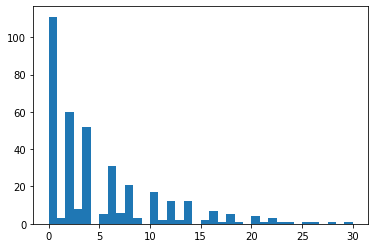

In [237]:
plt.hist(df.absences[(df.absences.notnull()) & (df.absences <=30)], bins=df.absences.nunique())

# score 

количество уникальных значений в данной категории - 18
диапазон данных - [  0.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  80.
  85.  90.  95. 100.  nan]
пустых значений - 6


(array([ 37.,   0.,   0.,   1.,   7.,  15.,   9.,  31.,  27., 100.,  30.,
         31.,  27.,  33.,  16.,   6.,  12.,   6.]),
 array([  0.        ,   5.55555556,  11.11111111,  16.66666667,
         22.22222222,  27.77777778,  33.33333333,  38.88888889,
         44.44444444,  50.        ,  55.55555556,  61.11111111,
         66.66666667,  72.22222222,  77.77777778,  83.33333333,
         88.88888889,  94.44444444, 100.        ]),
 <BarContainer object of 18 artists>)

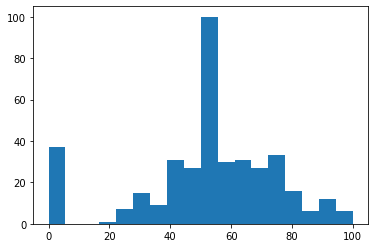

In [238]:
print('количество уникальных значений в данной категории - {}'.format(df.score.nunique()))
print('диапазон данных - {}'.format(df.score.sort_values().unique()))
print('пустых значений - {}'.format(len(df.score[df.score.isna()])))
#отобразим только ненулевые значения
plt.hist(df.score[df.score.notnull()], bins=df.score.nunique())

Большая часть студентов набрала больше 50 баллов. самая часто стречающаяся оценка лежит в диапазоне 50-55 баллов

# Неописанный признак.

количество уникальных значений в данной категории - 4
диапазон данных - [-12.  -9.  -6.  -3.  nan]
пустых значений - 7


(array([ 27.,  63., 194., 103.]),
 array([-12.  ,  -9.75,  -7.5 ,  -5.25,  -3.  ]),
 <BarContainer object of 4 artists>)

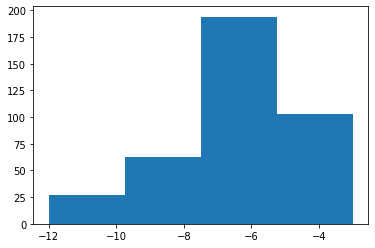

In [239]:

print('количество уникальных значений в данной категории - {}'.format(df['studytime, granular'].nunique()))
print('диапазон данных - {}'.format(df['studytime, granular'].sort_values().unique()))
print('пустых значений - {}'.format(len(df['studytime, granular'][df['studytime, granular'].isna()])))
#отобразим только ненулевые значения
plt.hist(df['studytime, granular'][df['studytime, granular'].notnull()], bins=df['studytime, granular'].nunique())

В исходных данных присутствует столбец, который неописывается в задании. Скорее всего это ошибка и данные не нужны. тем не менее, дабы исключить потерю важных данных оставим данный столбец.
так же, судя по характеру заполнения - пустых данных всего 7 - столбец несет в себе какуюто информацию, а не является случайным стоблцом

# Дальнейший анализ

# корреляционный анализ

Не смотря на то, что такие параметры как [Medu, Fedu, traveltime, studytime, famrel, freetime, goout, health] описываются числами - они относятся к номинативным переменным. 
к количественным переменным можно отнести только age, failures(с большой натяжкой. Данный признак рекомендуется исключить), absences, score

In [240]:
df1=pd.DataFrame()
for param in ['age', 'failures','absences', 'score']:
    df1[param]=df[param]


у численных переменных

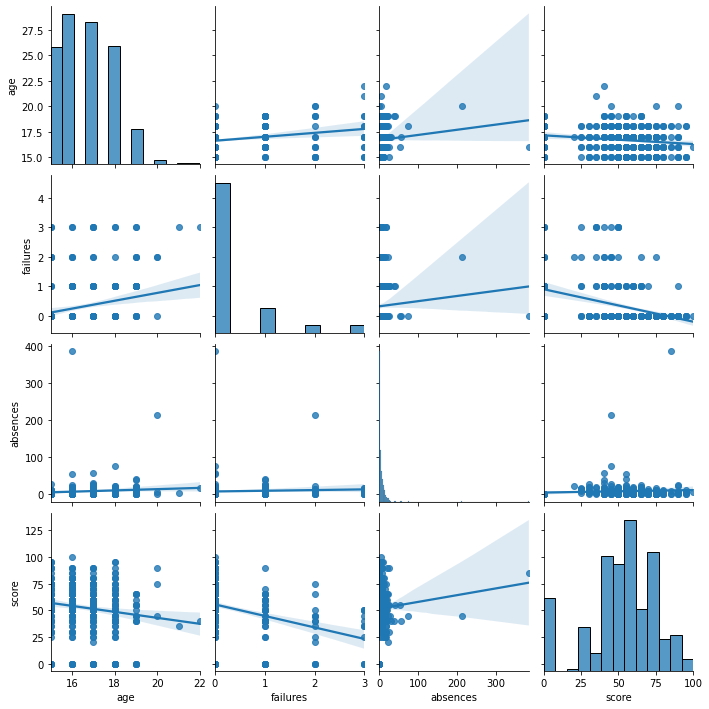

In [241]:
sns.pairplot(df1, kind = 'reg')

In [242]:
df1.corr()

,age,failures,absences,score
age,1.000000,0.227013,0.093323,-0.154946
failures,0.227013,1.000000,0.057234,-0.344060
absences,0.093323,0.057234,1.000000,0.065426
score,-0.154946,-0.344060,0.065426,1.000000


Заметно, что между возрастом, и количеством неудач есть положительная динамика - чем больше живешь тем больше неудач))
между интересующим нас параметром score наиболее сильная отрицатльная свзяь с параметром failures - чем меньше неудач было у студента по другим аспектам, тем выше у него бал по математике. Так же видна полоительная коррекляция между прогулами и результатами - что весьма странно

не забуду повторно отметить почему Series "failure" необходимо исключитть: по условию этот признак имеет значения от 0 до 3х включительно. где число отличное от нуля описывает количество неудач в диапазоне от 1 до 3х включительно. При этом отсутствие неудач как и 4 неудачи соответствуют одному значению - нулю

# Анализ номинативных переменных

In [243]:
# честно овзьмем код, описанный в примере
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [244]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

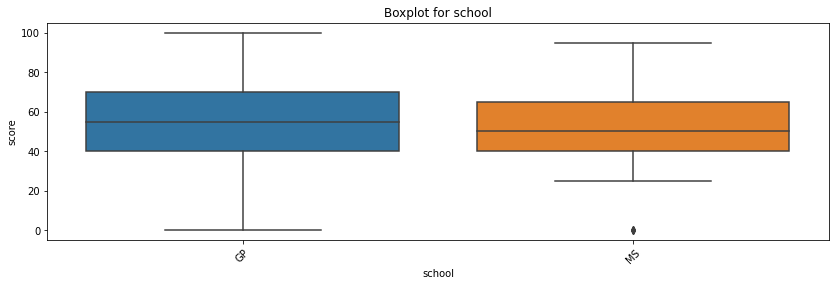

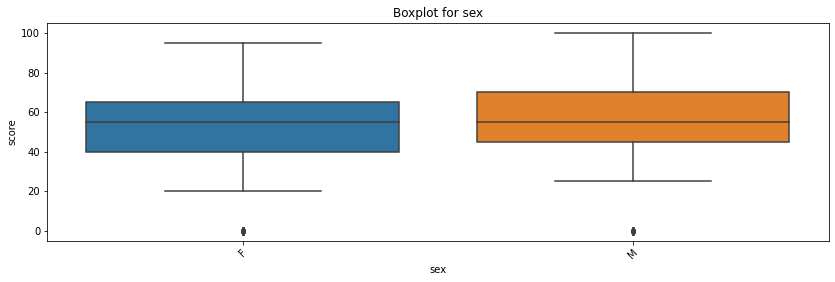

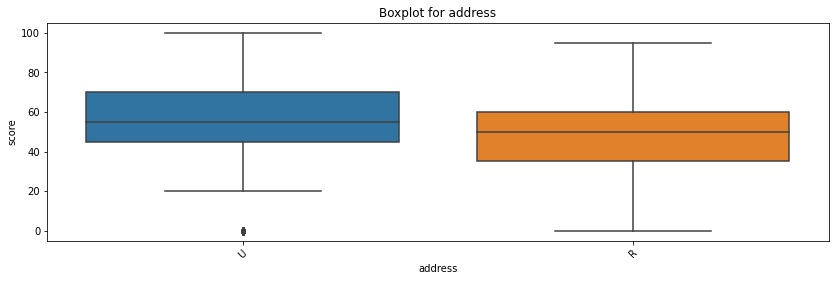

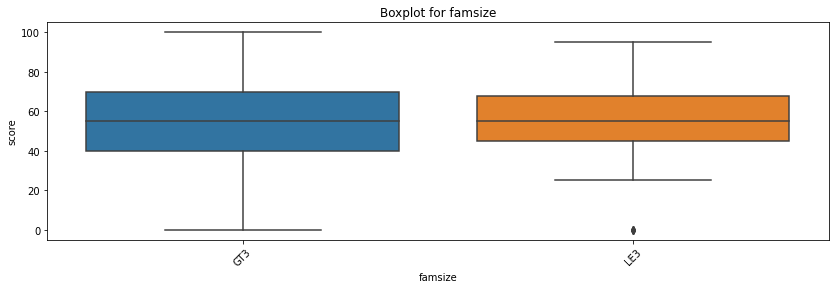

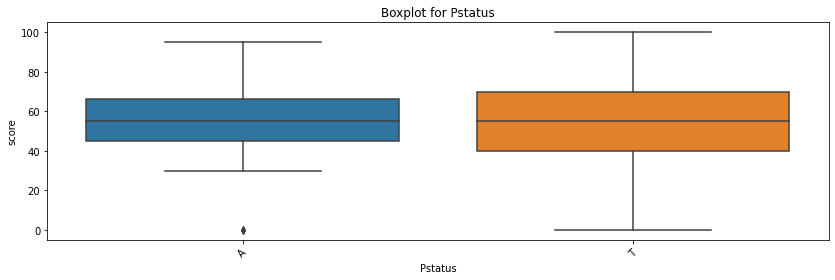

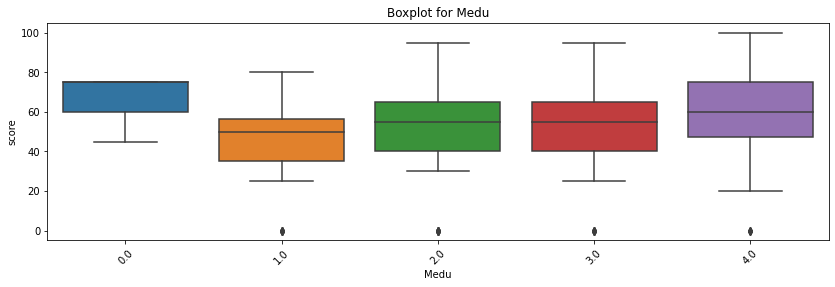

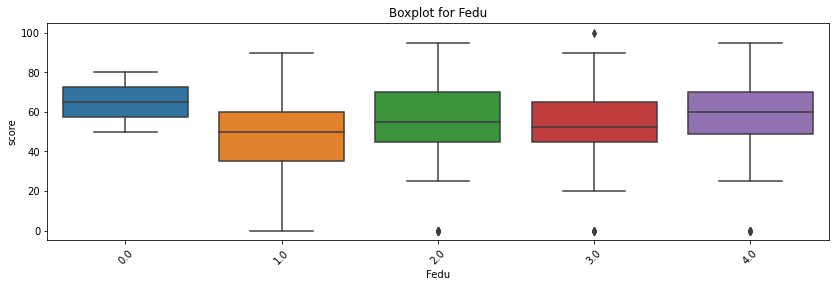

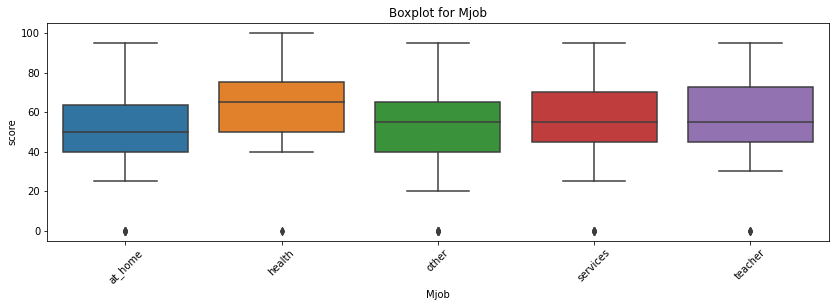

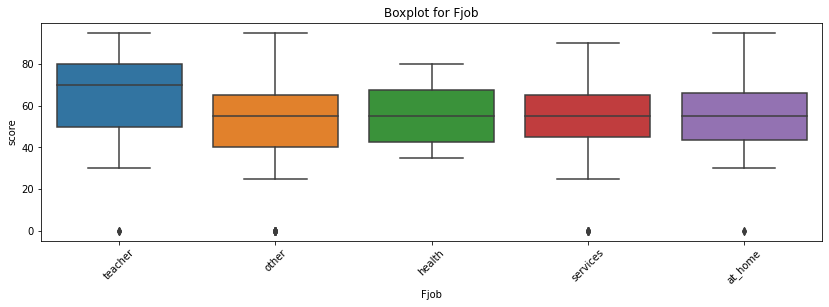

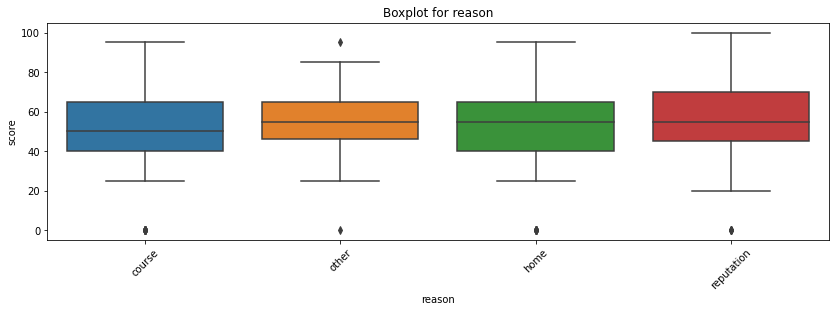

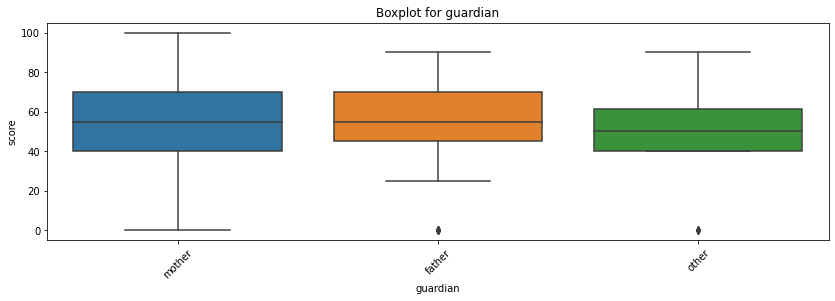

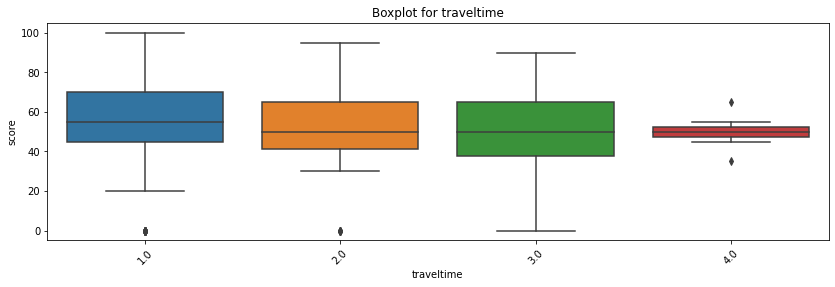

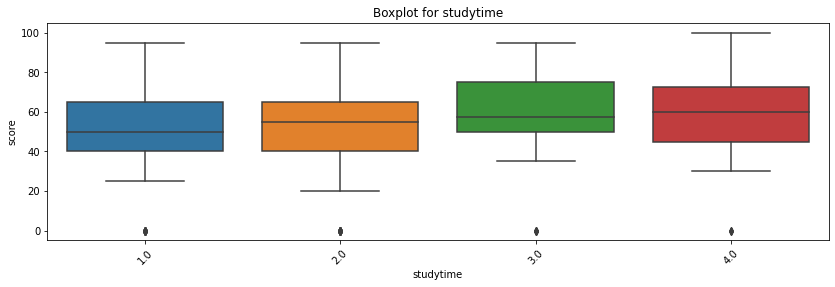

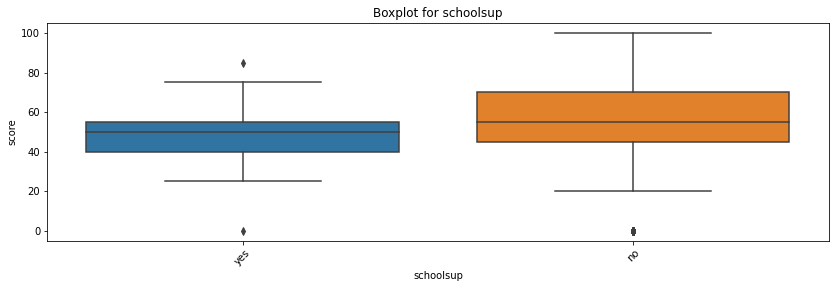

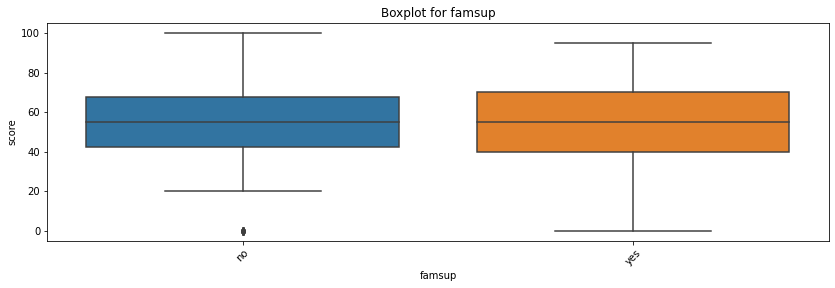

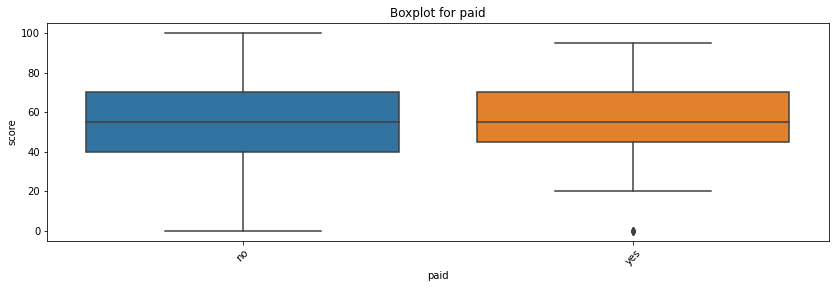

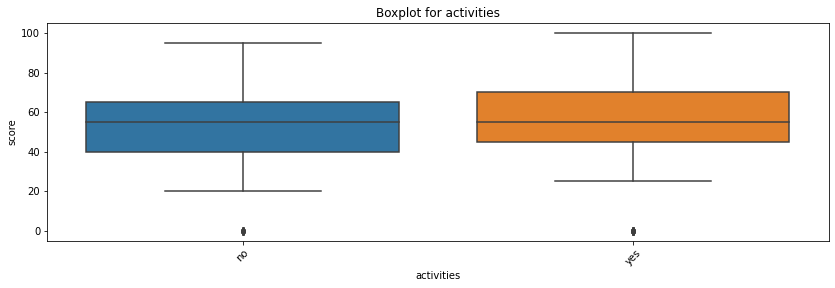

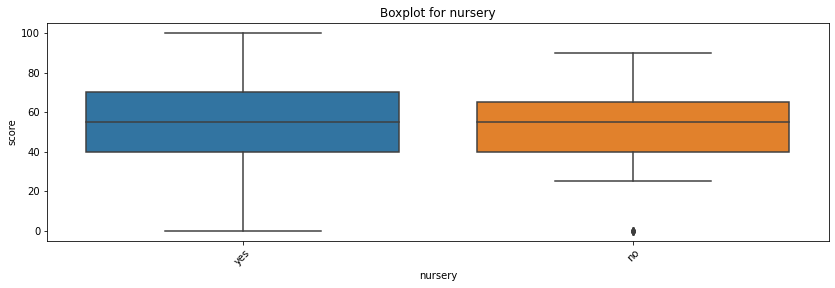

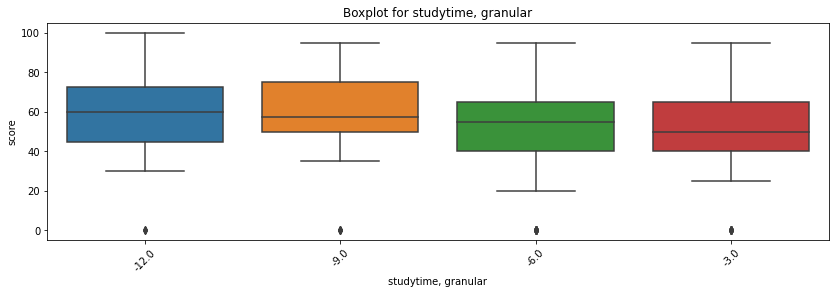

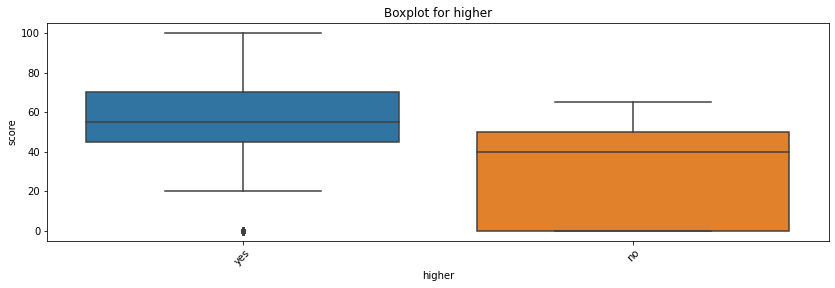

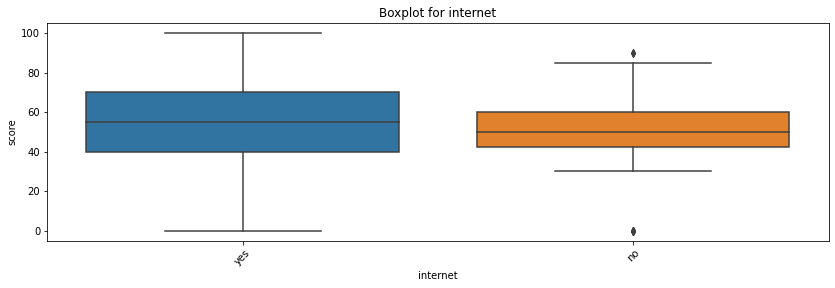

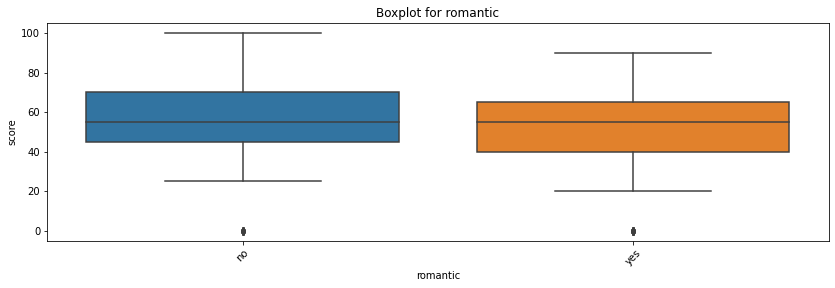

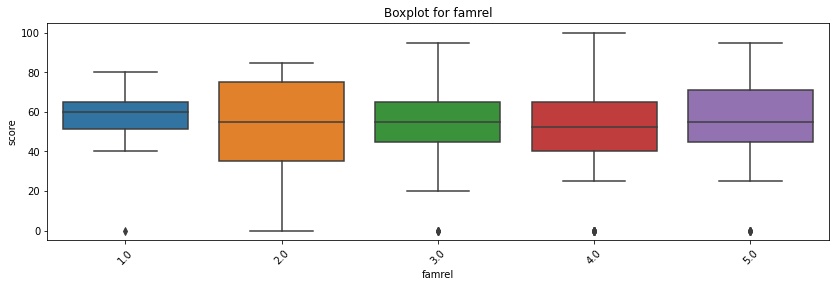

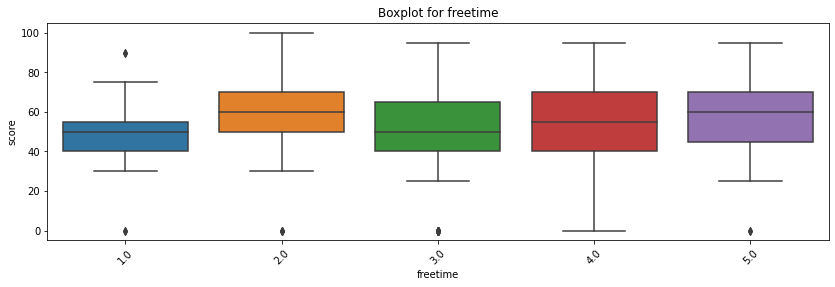

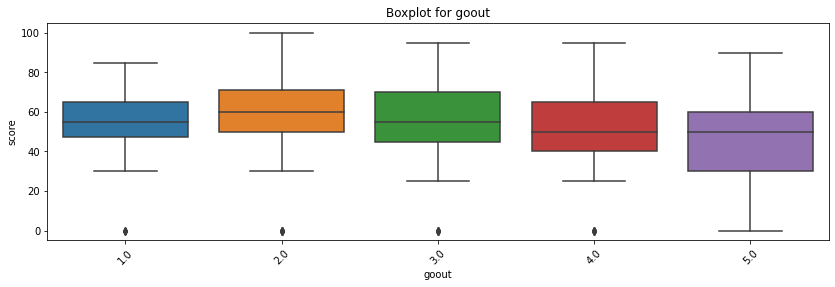

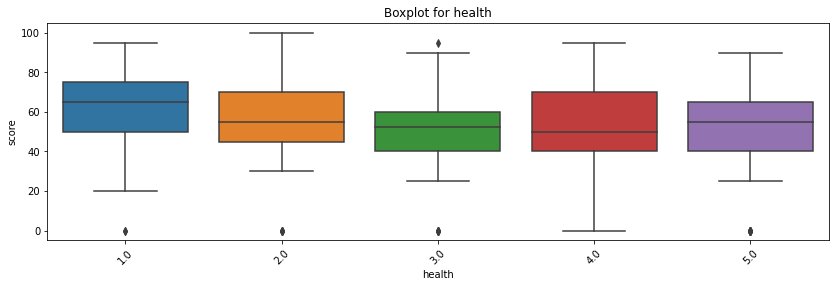

In [245]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health']:
    get_boxplot(col)

In [246]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [247]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


# Итоговый DataFrame

In [248]:
df_for_model = df.loc[:, ['Mjob', 'age', 'absences', 'score']]
df_for_model.head()

,Mjob,age,absences,score
0,at_home,18,6.0,30.0
1,at_home,17,4.0,30.0
2,at_home,15,10.0,50.0
3,health,15,2.0,75.0
4,other,16,4.0,50.0
